In [ ]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

# print(df.columns)
# print(df.head())

In [16]:
countries = ["Nigeria", "South Africa", "Kenya", "Uganda", "Tanzania", "Ghana", "Zimbabwe", "Rwanda", "Senegal", "Cameroon"]
df_filtered = df[df["location"].isin(countries)]
df_filtered["new_cases_smoothed"] = df_filtered["new_cases_smoothed"].fillna(0)
df_filtered["total_deaths"] = df_filtered["total_deaths"].fillna(df_filtered["total_deaths"].mean())


df_filtered.to_csv("cleaned_owid_covid_data.csv", index=False)

print(df_filtered.head())

C:\Users\MEME\AppData\Local\Temp\ipykernel_15028\1426706951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["new_cases_smoothed"] = df_filtered["new_cases_smoothed"].fillna(0)
C:\Users\MEME\AppData\Local\Temp\ipykernel_15028\1426706951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["total_deaths"] = df_filtered["total_deaths"].fillna(df_filtered["total_deaths"].mean())


      iso_code continent  location       date  total_cases  new_cases  \
26411      CMR    Africa  Cameroon 2020-03-06          1.0        1.0   
26412      CMR    Africa  Cameroon 2020-03-07          1.0        0.0   
26413      CMR    Africa  Cameroon 2020-03-08          2.0        1.0   
26414      CMR    Africa  Cameroon 2020-03-09          2.0        0.0   
26415      CMR    Africa  Cameroon 2020-03-10          2.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
26411                 0.0   5938.034418         NaN                  NaN  ...   
26412                 0.0   5938.034418         NaN                  NaN  ...   
26413                 0.0   5938.034418         NaN                  NaN  ...   
26414                 0.0   5938.034418         NaN                  NaN  ...   
26415                 0.0   5938.034418         NaN                  NaN  ...   

       female_smokers  male_smokers  handwashing_facilities  \
26411      

In [ ]:
cleaned_df = pd.read_csv("cleaned_owid_covid_data.csv")
print(cleaned_df.head())

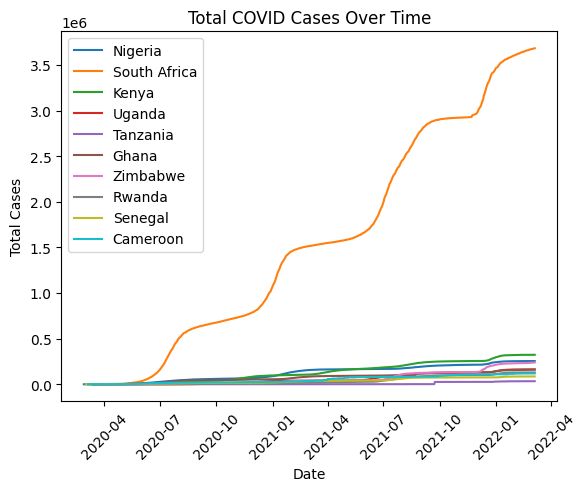

In [21]:
import matplotlib.pyplot as plt

# Group by date and country
for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["total_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Total COVID Cases Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

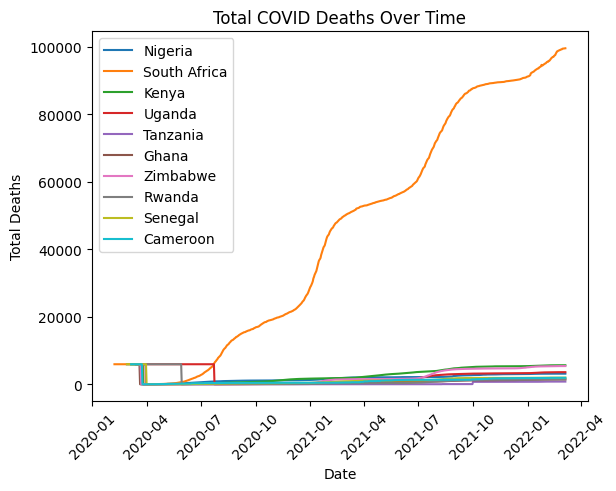

In [23]:
for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["total_deaths"], label=country)

plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.title("Total COVID Deaths Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

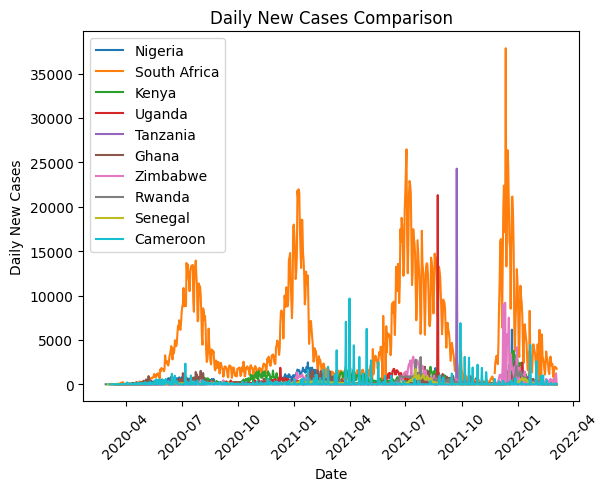

In [25]:
for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["new_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases Comparison")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [27]:
df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]
print(df_filtered[["location", "date", "death_rate"]].head())

       location       date   death_rate
26411  Cameroon 2020-03-06  5938.034418
26412  Cameroon 2020-03-07  5938.034418
26413  Cameroon 2020-03-08  2969.017209
26414  Cameroon 2020-03-09  2969.017209
26415  Cameroon 2020-03-10  2969.017209


C:\Users\MEME\AppData\Local\Temp\ipykernel_15028\1223343773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]


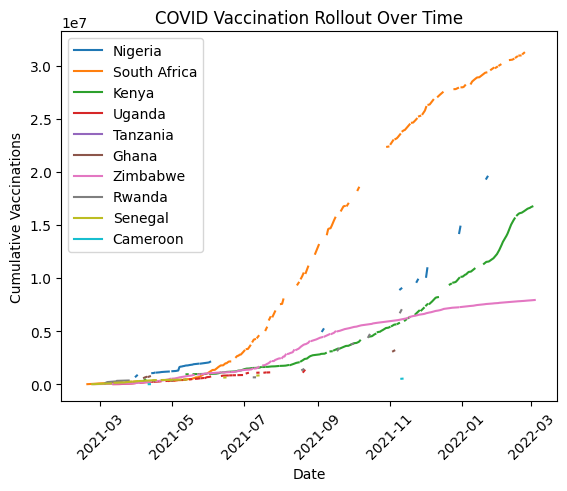

In [29]:
# Plot cumulative vaccinations over time
for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["total_vaccinations"], label=country)

plt.xlabel("Date")
plt.ylabel("Cumulative Vaccinations")
plt.title("COVID Vaccination Rollout Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


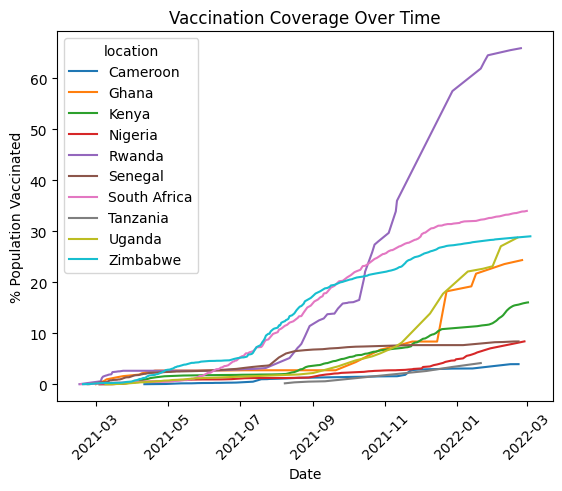

In [31]:
import seaborn as sns

# Plot % of population vaccinated
sns.lineplot(data=df_filtered, x="date", y="people_vaccinated_per_hundred", hue="location")

plt.xlabel("Date")
plt.ylabel("% Population Vaccinated")
plt.title("Vaccination Coverage Over Time")
plt.xticks(rotation=45)
plt.show()

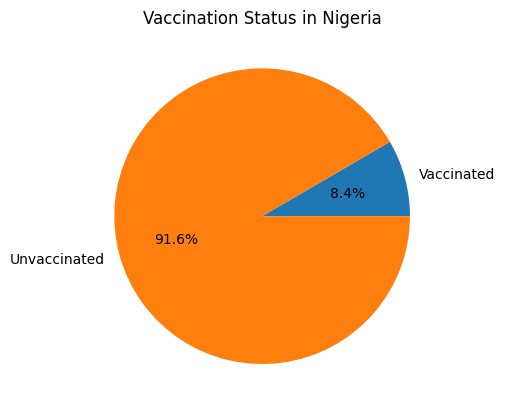

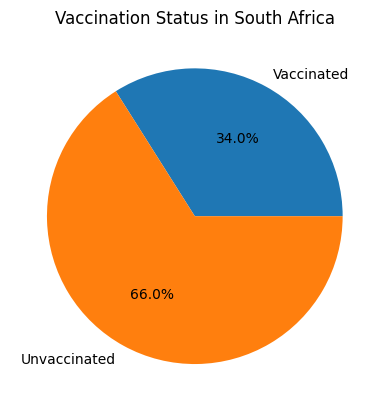

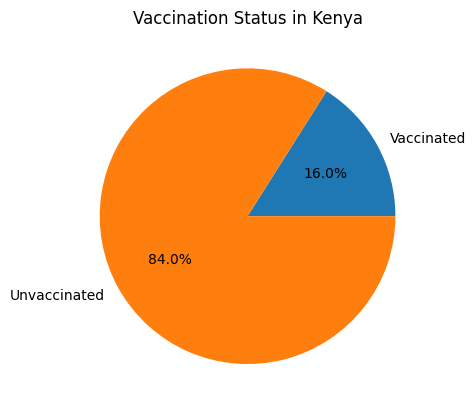

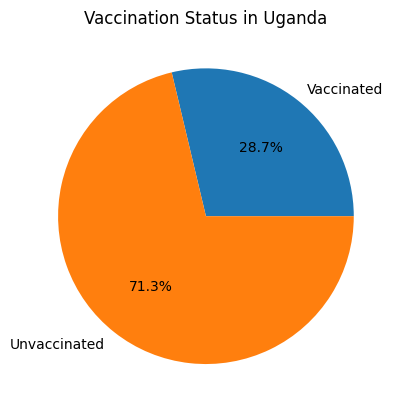

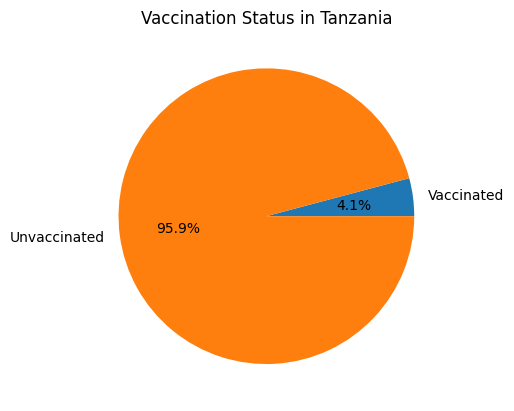

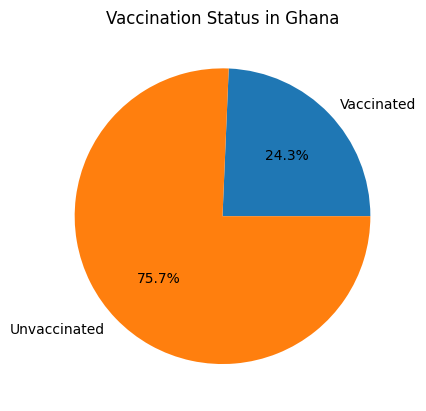

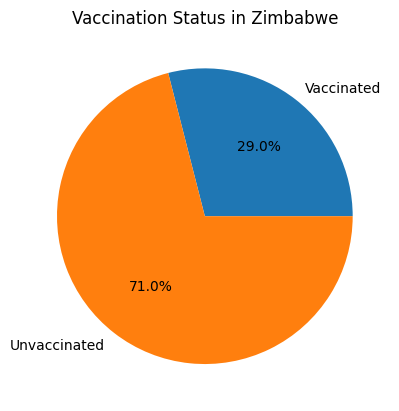

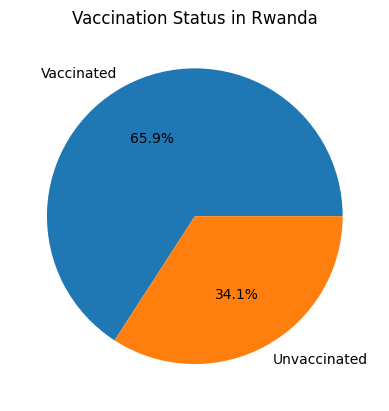

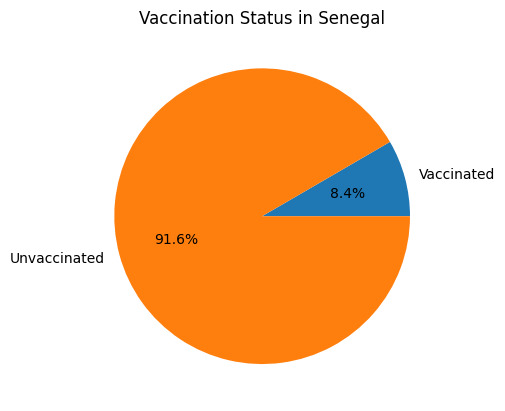

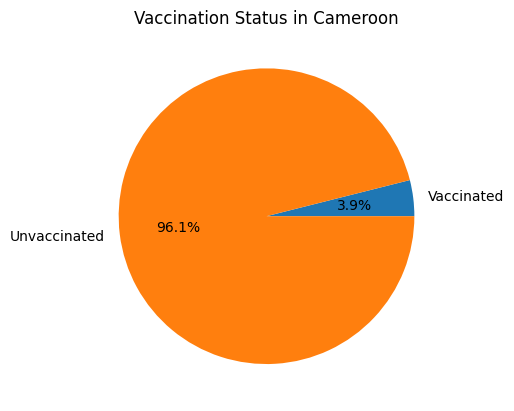

In [33]:
# Select latest data for each country
latest_data = df_filtered.groupby("location").last()

# Create pie chart for each country
for country in countries:
    vaccinated = latest_data.loc[country, "people_vaccinated_per_hundred"]
    unvaccinated = 100 - vaccinated
    
    plt.pie([vaccinated, unvaccinated], labels=["Vaccinated", "Unvaccinated"], autopct="%1.1f%%")
    plt.title(f"Vaccination Status in {country}")
    plt.show()

In [34]:
# import pandas as pd

# # Load the dataset
# df = pd.read_csv("owid-covid-data.csv")

# Get the latest data per country
latest_data = cleaned_df.groupby("iso_code").last().reset_index()

# Keep only necessary columns
df_map = latest_data[["iso_code", "location", "total_cases", "people_vaccinated_per_hundred"]]

In [35]:
import plotly.express as px

# plotting total cases

fig = px.choropleth(
    df_map, 
    locations="iso_code", 
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title="COVID-19 Case Density by Country"
)

fig.show()

In [36]:
# Plotting vaccination rates

fig = px.choropleth(
    df_map, 
    locations="iso_code", 
    color="people_vaccinated_per_hundred",
    hover_name="location",
    color_continuous_scale="Blues",
    title="COVID-19 Vaccination Rates by Country"
)

fig.show()